In [1]:
#Importing libraries
import pandas as pd
import sweetviz as sv #For EDA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np


In [2]:
#Reading the data
house = pd.read_csv("C:\\Users\\user\\Downloads\\Housing price assign\\train.csv")

In [3]:
#Doing Basic checks

In [4]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
Id = house["Id"]

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#We could see from the above that there are some null values in the data

In [9]:
house.shape

(1460, 81)

In [10]:
#Checking for the null values
pd.set_option('display.max_rows', None)

house.columns[house.isnull().any()]
for i in house.columns[house.isnull().any()]:
    if house[i].isna().sum()/len(house[i])*100>0:
        print ('{0}     {1}'.format(i, house[i].isna().sum()/len(house[i])*100))

LotFrontage     17.73972602739726
Alley     93.76712328767123
MasVnrType     0.547945205479452
MasVnrArea     0.547945205479452
BsmtQual     2.5342465753424657
BsmtCond     2.5342465753424657
BsmtExposure     2.6027397260273974
BsmtFinType1     2.5342465753424657
BsmtFinType2     2.6027397260273974
Electrical     0.0684931506849315
FireplaceQu     47.26027397260274
GarageType     5.5479452054794525
GarageYrBlt     5.5479452054794525
GarageFinish     5.5479452054794525
GarageQual     5.5479452054794525
GarageCond     5.5479452054794525
PoolQC     99.52054794520548
Fence     80.75342465753424
MiscFeature     96.30136986301369


In [11]:
"""""#Doing EDA using Sweetviz 
advert_report = sv.analyze(house)
advert_report.show_html('Advertising.html')"""""

'""#Doing EDA using Sweetviz \nadvert_report = sv.analyze(house)\nadvert_report.show_html(\'Advertising.html\')'

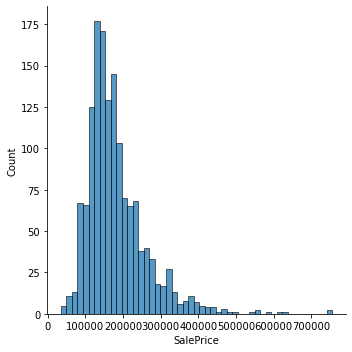

In [12]:
#Plot showing skewed data in target variable
sns.displot(house["SalePrice"])
plt.show()

In [13]:
#Transforming the target variable "SalePrice" as it having skewed data using logarithmic transformation
transformed = house["SalePrice"].transform(np.log)

In [14]:
house["SalePrice"] = transformed

In [15]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


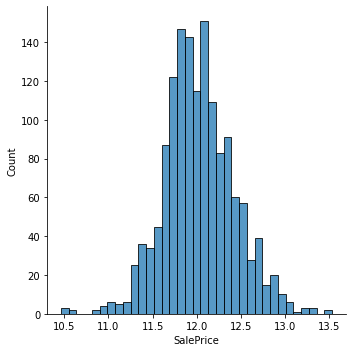

In [16]:
#After transformation
sns.displot(house["SalePrice"])
plt.show()

In [17]:
#After the EDA we could see many columns are having missing values more than 50% we removing those value which we cannot even try to 
#impute with
# also there are imbalanced columns with like 80% pointing to a same value we will be removing those columns as well
#We are dropping the ID columns as well there is no much importance of it.
#Some values are hvaing Na values like in PoolQc which means there is no pool in the property such values are also removed as it is having skewed data
droplist = ["Id","Street","Alley","LandContour","Utilities","LandSlope","Condition1","Condition2","BldgType","RoofStyle","RoofMatl","ExterCond",
"BsmtCond","BsmtFinType2","BsmtFinSF2","Heating","CentralAir","Electrical","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","Functional",
"GarageQual","GarageCond","PavedDrive","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","PoolQC","Fence","MiscFeature","MiscVal",
"SaleType","SaleCondition"]
for i in droplist:
    house = house.drop(i,axis=1)

In [18]:
house.shape

(1460, 46)

In [19]:
house.columns[house.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish'],
      dtype='object')

In [20]:
#Imputing numerical values with mean and categorical values with word "Unknown"
house = house.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna("Unknown"))

In [21]:
#Checking null values after imputation
house.columns[house.isnull().any()]

Index([], dtype='object')

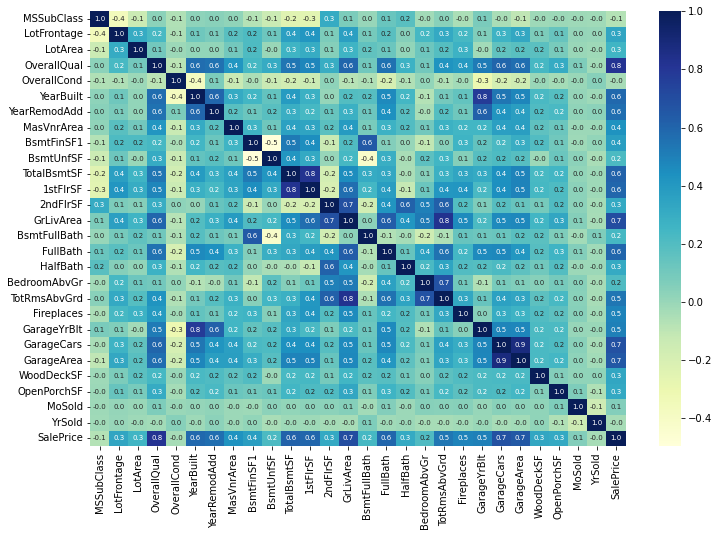

In [22]:
#Ploting the correlation of features,annot_kws={'size': 7} this adjusts the size of annot,fmt='.1f' this rounds the size of the annot
#We can see the same correlation as association in Sweetviz chart
plt.figure (figsize= (12,8))
sns.heatmap(house.corr(),cmap="YlGnBu", annot=True,annot_kws={'size': 7},fmt='.1f')
plt.show()

In [23]:
#We are not handling colinearity by dropping those columns as we will look how Lasso handles it

In [24]:
#Creating dummy variables
house = pd.get_dummies(house,drop_first=True)

In [25]:
house.shape

(1460, 146)

In [26]:
#Now data handling mostly done so will Split the data for model building
df_train, df_test = train_test_split(house,train_size=.8, random_state=100)

In [27]:
df_train.shape

(1168, 146)

In [28]:
df_test.shape

(292, 146)

In [29]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,FireplaceQu_Unknown,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown
133,20,70.049958,6853,8,5,2001,2002,136.0,1005,262,...,1,1,0,0,0,0,0,0,0,0
290,60,120.000000,15611,8,5,2006,2006,0.0,0,1079,...,0,1,0,0,0,0,0,1,0,0
24,20,70.049958,8246,5,8,1968,2001,0.0,188,204,...,0,1,0,0,0,0,0,0,1,0
1093,20,71.000000,9230,5,8,1965,1998,166.0,661,203,...,1,0,0,0,0,1,0,0,1,0
1288,120,40.000000,5664,8,5,2000,2000,0.0,1158,343,...,0,1,0,0,0,0,0,0,0,0


In [30]:
#Now we will scale the data
# fit scaler on training data
scaler = MinMaxScaler()

# transform training data
df_train = pd.DataFrame(scaler.fit_transform(df_train),columns=df_train.columns)

# transform testing data
df_test = pd.DataFrame(scaler.fit_transform(df_test),columns=df_test.columns)


In [31]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,FireplaceQu_Unknown,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown
0,0.000000,0.167979,0.025955,0.777778,0.500,0.934783,0.866667,0.08500,0.178065,0.112158,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.235294,0.339041,0.066891,0.777778,0.500,0.971014,0.933333,0.00000,0.000000,0.461901,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.167979,0.032466,0.444444,0.875,0.695652,0.850000,0.00000,0.033310,0.087329,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.171233,0.037066,0.444444,0.875,0.673913,0.800000,0.10375,0.117116,0.086901,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.588235,0.065068,0.020398,0.777778,0.500,0.927536,0.833333,0.00000,0.205174,0.146832,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#Making X_train and X_test data
X_train = df_train.drop(["SalePrice"],axis=1)
y_train = df_train["SalePrice"]



X_test = df_test.drop(["SalePrice"],axis=1)
y_test = df_test["SalePrice"]

In [33]:
#Importing the library required for Ridge and creating a object for it
from sklearn.linear_model import Ridge
ridge = Ridge()



In [34]:
#List of alpha for tuning 
params = {"alpha":[.00001,.0001,.001,.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,2,3,4,5,6,7,8,9,10,20,50,100,500,1000,]} 

In [35]:
#We will do cross validation to get alpha
folds = 5

model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring = "neg_mean_absolute_error",
                       cv = folds,
                       return_train_score=True,
                       verbose=1)

In [36]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                                   4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
#Printing the best alpha
print(model_cv.best_params_)

{'alpha': 2}


In [38]:
#Fitting the ridge model with alpha 0.01

alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)

#Printing the penalised coefficients
print(ridge.coef_)

[-3.57312248e-02 -2.01705147e-02  5.78039924e-02  1.25609431e-01
  9.03752349e-02  2.90231534e-02  2.33631607e-02  2.67257167e-03
  8.07039118e-03  1.53590511e-02  3.50037874e-02  8.65328672e-02
  5.68641319e-02  9.44871928e-02  4.71831649e-02  4.59822083e-02
  2.38301621e-02  3.08200886e-02  5.77813365e-02  7.84554717e-03
 -1.54886901e-03  5.41300293e-02  3.53641836e-02  2.17537875e-02
 -1.92085892e-03  2.33011670e-03 -7.67190417e-03  6.15215448e-02
  4.53089458e-02  5.32459444e-02  4.10377473e-02  8.11317517e-03
 -2.97023602e-02 -1.18035461e-03  1.10794595e-02 -2.10566685e-02
 -1.83913924e-02 -2.05158880e-03 -1.68769204e-02 -3.01045641e-02
  3.04912511e-03  2.63172601e-02  2.99177526e-03  4.86540681e-02
 -2.91503437e-02 -6.55950833e-03 -3.54282942e-02 -5.37672602e-02
 -9.51980163e-03 -6.33628824e-03 -3.14585166e-03 -7.79727285e-03
  3.87933174e-02  4.10939373e-02 -1.50672081e-02  9.39645579e-04
 -1.40036237e-02 -8.81028761e-05  2.23343574e-02  4.88640630e-02
  5.11339158e-03  2.00479

In [39]:
#predicting the values

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [40]:
#Evaluating metrics like R2 score, RMSE,RSS

metric2 = [] #created a list to store the values

r2_train_lr = r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train,y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test,y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr)

0.905136594430834
0.8600972096046914
321.2919141928048
96.03248762154729
0.055217650317461744
0.05192489541542004


In [41]:
#Lasso regression

#Fitting the ridge model with alpha 0.01
from sklearn.linear_model import Lasso
lasso = Lasso()


#List of alpha for tuning 
params = {"alpha":[.00001,.0001,.001,.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,2,3,4,5,6,7,8,9,10,20,50,100,500,1000,]} 

#We will do cross validation to get alpha
folds = 5

model_cv1 = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring = "neg_mean_absolute_error",
                       cv = folds,
                       return_train_score=True,
                       verbose=1)
model_cv1.fit(X_train,y_train)



Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                                   4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [42]:
#Printing the best alpha
print(model_cv1.best_params_)

{'alpha': 0.0001}


In [43]:
#Fitting the ridge model with alpha 0.01

alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)

#Printing the penalised coefficients
print(lasso.coef_)

[-3.37422012e-02 -9.46960824e-04  6.07044681e-02  1.56651573e-01
  1.03463864e-01  4.67227984e-02  2.00268137e-02  0.00000000e+00
  0.00000000e+00  5.25910397e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.87446008e-01  4.94067371e-02  3.54967290e-02
  1.87478670e-02  1.48791432e-02  4.94336176e-02  0.00000000e+00
  0.00000000e+00  6.85154904e-02  1.39306099e-02  1.88333557e-02
 -0.00000000e+00  0.00000000e+00 -6.67917045e-03  5.76091086e-02
  3.81870653e-02  4.67155680e-02  2.78607277e-02  5.75143581e-03
 -2.70039327e-02 -1.21991705e-03  1.16225488e-02 -1.36362887e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -9.64960353e-03
  7.08216813e-03  2.95034415e-02  5.22194508e-03  4.80296108e-02
 -2.32482035e-02 -1.51499256e-03 -2.40423310e-02 -3.35546570e-02
 -7.71966617e-04 -2.55357393e-04 -0.00000000e+00 -1.59569609e-03
  3.64112157e-02  4.26407492e-02 -4.90907331e-03  0.00000000e+00
 -6.47361023e-03  0.00000000e+00  2.04207306e-02  4.86198785e-02
  4.72429138e-03  1.38729

In [44]:
#predicting the values

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [45]:
#Evaluating metrics like R2 score, RMSE,RSS

metric2 = [] #created a list to store the values

r2_train_lr = r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train,y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test,y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr)

0.9020550337378036
0.882853472896551
321.2919141928048
96.03248762154729
0.055217650317461744
0.05192489541542004


In [46]:
#Finding significant columns or features for the price using Lasso
col = pd.DataFrame(index=X_train.columns)

col.rows = X_train.columns

col["Lasso"] =lasso.coef_

C:\Users\user\AppData\Local\Temp/ipykernel_6000/3205294117.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  col.rows = X_train.columns


In [47]:
col.sort_values("Lasso",ascending=False).head(10)

,Lasso
GrLivArea,0.287446
OverallQual,0.156652
OverallCond,0.103464
GarageCars,0.068515
LotArea,0.060704
MSZoning_FV,0.057609
TotRmsAbvGrd,0.049434
BsmtFullBath,0.049407
Neighborhood_StoneBr,0.048620
Neighborhood_Crawfor,0.048030


The best model is the one used Lasso Regression as it showed better model performance

The company can  use features like  GrLivArea  ,  OverallQual  , OverallCond  ,  GarageCars  ,  LotArea -  to when considering to
buy a house cheap and flip it

GrLivArea	0.287446
OverallQual	0.156652
OverallCond	0.103464
GarageCars	0.068515
LotArea	0.060704

These are the top five significant values after Lasso regression for SalePrice prediction

After removing above top 5 below are the next significant top5 features

1stFlrSF	-- 0.255949
2ndFlrSF	-- 0.128156
GarageArea	- -0.086085
MSZoning_FV	-- 0.076132
MSZoning_RL	-- 0.067321

Subjective questions Answer 1:
    
    Ridge
OverallQual 0.114363

Lasso GrLivArea 0.285229

In [ ]:
import xgboost as xgb

xg = xgb.XGBRegressor()

xg.fit(X_train,y_train)







In [49]:
r2_train_xg = r2_score(y_test,xg.predict(X_test))
print(r2_train_xg)
metric2.append(r2_train_xg)


0.7164547461848052


In [53]:
param = {"learning_rate":[0.10,.150,.20,.250,.30,.350,.40,.450,.5],
        "max_depth":[2,4,6,8,10],
        "min_child_weight":[1,10,20,30,40,50],
        "n_estimators":[100,200,300,400,500]}

In [ ]:
xg2 = GridSearchCV(estimator=xg,
                   param_grid=param,
                   n_jobs=1,
                   cv=5,
                   refit=True)

xg2.fit(X_train,y_train)

In [ ]:
xg2.best_params_